# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from typing import List
from mpl_toolkits.mplot3d import Axes3D

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [46]:
m:int = 50
n:int = 12
A,b = main.spare_matrix_Abt(m,n)
#print(A,b)
#1
print('Funkcja square_from_rectan')
def solve_1(A,b):
    A1,b1 = main.square_from_rectan(A,b)
    return np.linalg.solve(A1,b1)
X1=solve_1(A,b)
print(X1)

#2
print('Metoda lstq')
def solve_2(A,b):
    return np.linalg.lstsq(A,b,rcond=None)[0]
X2 = solve_2(A,b)
print(X2)

#3
print('Metoda QR')
def solve_3(A,b):
    Q,R = np.linalg.qr(A)
    return sp.linalg.solve_triangular(R,Q.T@b)
X3 = solve_3(A,b)
print(X3)
#4
print('Rozkład SVD')
def solve_4(A,b):
    U,s,V = np.linalg.svd(A,full_matrices=False)
    S = np.diag(s)
    return V.T@np.linalg.solve(S,U.T@b)
X4 = solve_4(A,b)
print(X4)





Funkcja square_from_rectan
[ 1.00000001e+00 -4.11078826e-06 -7.99984110e+00 -2.40121326e-03
  1.06854816e+01 -8.66602767e-02 -5.43957994e+00 -4.56851402e-01
  2.14599324e+00 -3.27998596e-01 -2.34553294e-01  6.27715031e-02]
Metoda lstq
[ 1.00000000e+00 -4.22742847e-07 -7.99998124e+00 -3.18763205e-04
  1.06694308e+01 -1.38202873e-02 -5.64707563e+00 -7.53160209e-02
  1.69360696e+00  6.03211182e-03 -3.74241705e-01  8.80405763e-02]
Metoda QR
[ 1.00000000e+00 -4.22742838e-07 -7.99998124e+00 -3.18763210e-04
  1.06694308e+01 -1.38202875e-02 -5.64707563e+00 -7.53160218e-02
  1.69360696e+00  6.03211109e-03 -3.74241704e-01  8.80405763e-02]
Rozkład SVD
[ 1.00000000e+00 -4.22742833e-07 -7.99998124e+00 -3.18763208e-04
  1.06694308e+01 -1.38202874e-02 -5.64707563e+00 -7.53160214e-02
  1.69360696e+00  6.03211138e-03 -3.74241705e-01  8.80405763e-02]


75.1 µs ± 20.5 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
171 µs ± 54.5 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
The slowest run took 6.30 times longer than the fastest. This could mean that an intermediate result is being cached.
298 µs ± 159 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
179 µs ± 44.1 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)


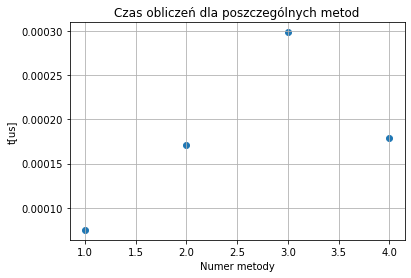

In [3]:
#Złożoność czasowa poszczególnych metod
time:List=[]
methods:List = [1,2,3,4]

saved_timing = %timeit -r 20 -n 20 -o solve_1(A,b) 
time.append(saved_timing.average)
saved_timing = %timeit -r 20 -n 20 -o solve_2(A,b)
time.append(saved_timing.average)
saved_timing = %timeit -r 20 -n 20 -o solve_3(A,b)
time.append(saved_timing.average)
saved_timing = %timeit -r 20 -n 20 -o solve_4(A,b)
time.append(saved_timing.average)

plt.figure()
plt.scatter(methods,time)
plt.title("Czas obliczeń dla poszczególnych metod")
plt.xlabel("Numer metody")
plt.ylabel("t[us]")
plt.grid()


In [4]:
#6 Jakość rozwiązania poszczególnych metod
print("Jakość rozwiązania metodą 1: {}".format(main.residual_norm(A,X1,b)))
print("Jakość rozwiązania metodą 2: {}".format(main.residual_norm(A,X2,b)))
print("Jakość rozwiązania metodą 3: {}".format(main.residual_norm(A,X3,b)))
print("Jakość rozwiązania metodą 4: {}".format(main.residual_norm(A,X4,b)))


Jakość rozwiązania metodą 1: 6.042121367005774e-08
Jakość rozwiązania metodą 2: 7.999154155449428e-09
Jakość rozwiązania metodą 3: 1.818077245821023e-08
Jakość rozwiązania metodą 4: 4.904394274525018e-08


**Komentarz**  
Najniższy czas obliczeń został uzyskany przy pomocy metody 1 czyli metody sprowadzania macierzy A do macierzy kwadratowej, natomiast najwyższy dla rozkładu QR. Najbardziej skuteczną i najdokładniejszą okazała się być metoda 2, czyli metoda lstq.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

[-0.6301428   4.54912395]


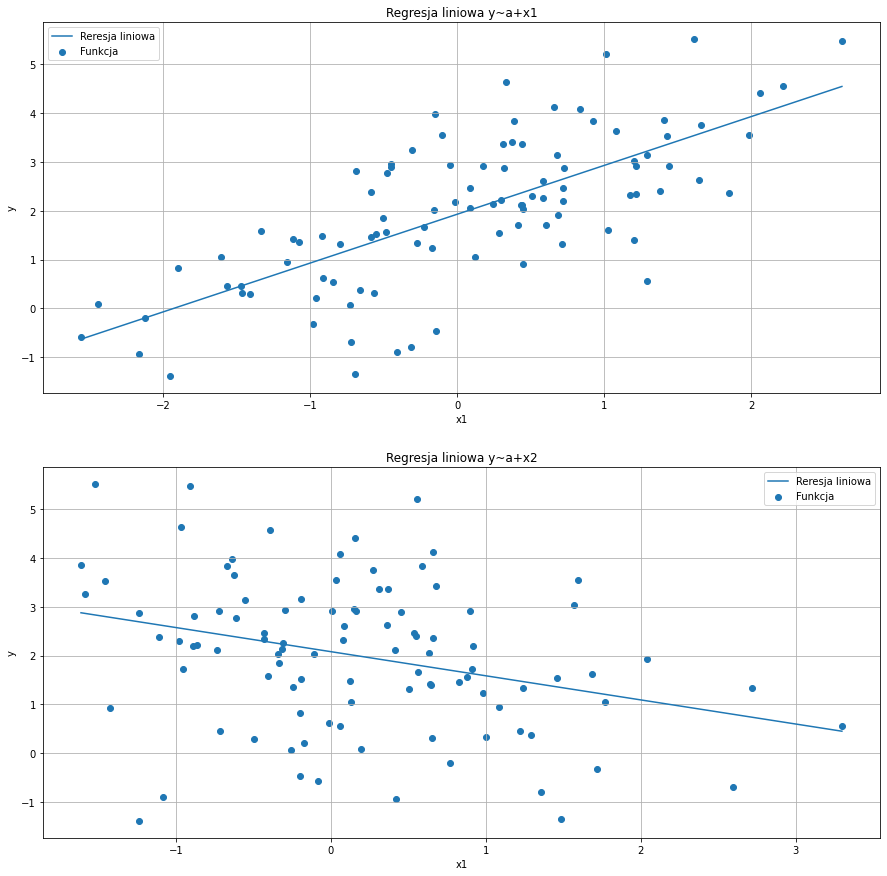

In [47]:
#1 
x1 = np.random.normal(0,1,size=(100,1))
x2 = np.random.normal(0,1,size=(100,1))
#2
e = np.random.normal(0,1,size=(100,1))
y = 2 +x1 - 0.5*x2+e

#3 
ones = np.ones((100,1),dtype=int)
v1 = np.concatenate((ones,x1),axis=1)
v2 = np.concatenate((ones,x2),axis=1)
v3 = np.concatenate((ones,x1,x2),axis=1)
v4 = np.concatenate((ones,x2,x2),axis=1)

#4
pred1 = [min(x1),max(x1)]
pred2 = [min(x2),max(x2)]
B1 = solve_3(v1,y)
B2 = solve_3(v2,y)
B3 = solve_3(v3,y)
#B4 = solve_3(v4,y)

y1 = B1[0] + pred1@B1[1]
y2 = B2[0] + pred2@B2[1]
y3 = B3[0] + x1@B3[1] + x2@B3[2]
y4 = B4[0] + x1@B4[1] + x2@B4[2]

plt.figure(figsize=(15,15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)



#Regresja liniowa y~a+x1
ax1.plot(pred1,y1,label='Reresja liniowa')
ax1.scatter(x1,y,label='Funkcja')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.set_title('Regresja liniowa y~a+x1')
ax1.grid()
ax1.legend()

#Regresja liniowa y~a+x2
ax2.plot(pred2,y2,label='Reresja liniowa')
ax2.scatter(x2,y,label='Funkcja')
ax2.set_xlabel('x1')
ax2.set_ylabel('y')
ax2.set_title('Regresja liniowa y~a+x2')
ax2.grid()
ax2.legend()







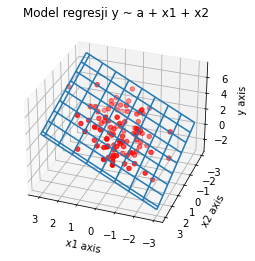

In [33]:

q, r = np.linalg.qr(v3)
beta = sp.linalg.solve_triangular(r, q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x1
Y = x2
Z = y

ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x1 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y ~ a + x1 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = beta[0] + beta[1] * X + beta[2] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)

ax.view_init(30,110)


plt.show()

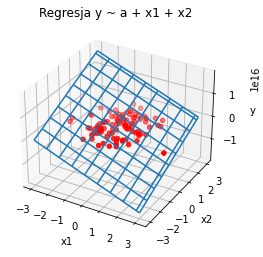

In [32]:

q, r = np.linalg.qr(v4)
beta = sp.linalg.solve_triangular(r, q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x1
Y = x2
Z = y

ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Regresja y ~ a + x1 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = beta[0] + beta[1] * X + beta[2] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)

plt.show()


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

**Wnioski**   
1.Zajęcia te pozwoliły mi zapoznać się z numerycznymi rozwiązywaniami układami równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi.  
2.W zadadniu pierwszym musieliśmy pamiętać o podstawowych funkcjach linspace do zdefiniowania wektoru. Do definicji macierzy A korzystaliśmy z gotowych funkcji biblioteki numpy: vander oraz fliplr. Należało zdefiniować funkcje square_from_rectan, która przekształci układ równań do postaci:A^TAx = A^Tb. Taki układ równań można rozwiązać metodą QR, która polega na tym, że rozkładamy macierz A do iloczynu A=QR, gdzie Q jest macierzą ortogonalną(QQ^T=I), a R jest macierzą trójkątną górną.Rozkład ten zawiera dwa algorytmy: ortogonalizajce Gramma-Schmidtta i triangularyzacje Housheldera. Do rozwiązaynwania układów równań możemy zastosować rozkład na wartości singularne SVD, który polega na zapisaniu macierzy A wymiaru m x n w postaci A=UEV*, gdzie U i V są macierzami ortogonalnymi(U^-1=U^T), zaś E jest macierża diagonalną wymiaru mxn.
Musieliśmy jeszcze porównać czasy wykonania metod oraz porównać jakość otrzymanych wyników. Do jakości wyników posłużyłem się normą residuum. Okazało się że metoda z biblioteki numpy lstq charakteryzuje się największą dokładnością. Jeżeli chodzi o czasy obliczeń to najlepszą okazała sie być metoda sprowadzenia układu równań do postaci A^TAx = A^Tb.  
3.W zadaniu drugim należało wygenerować dwa wektory x1 oraz x2  przy użyciu funkcji random.normal. Następnie przy pomocy funkcji concantenate połączyć wektory samych jedynek z wyżej wymienionymi wektorami. Na koniec należało wyliczyć współczynnik regresji liniowych z wykorzystaniem rozkładu QR i przedstawić je na wykresach punktowych.